# Исследовательский анализ данных

## Описание проекта "Промышленность"

### Описание задачи

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

### Описание предметной области

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## Подготовка к выполнению проекта

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

### Импорт данных

In [2]:
PATH__DATA = r'/datasets/final_steel/'

DATA_ARC = PATH__DATA + r'data_arc.csv'
DATA_BULK = PATH__DATA + r'data_bulk.csv'
DATA_BULK_TIME = PATH__DATA + r'data_bulk_time.csv'
DATA_GAS = PATH__DATA + r'data_gas.csv'
DATA_TEMP = PATH__DATA + r'data_temp.csv'
DATA_WIRE = PATH__DATA + r'data_wire.csv'
DATA_WIRE_TIME = PATH__DATA + r'data_wire_time.csv'

### Настройки проекта

In [3]:
GLOBAL__RANDOM_STATE = 0

## Анализ данных

### Данные об электродах

In [4]:
df_arc = pd.read_csv(DATA_ARC)

In [5]:
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [6]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


#### Признак "key"

In [9]:
df_arc['key'].value_counts().head(10)

2108    16
1689    15
1513    15
2567    14
46      13
322     13
1829    12
2916    12
44      12
1958    11
Name: key, dtype: int64

In [10]:
df_arc['key'].nunique()

3214

#### Признак "Активная мощность"

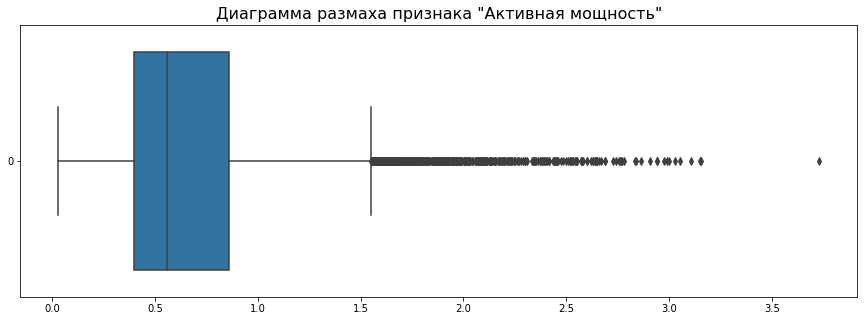

In [36]:
plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['Активная мощность'], orient='h')

plt.title('Диаграмма размаха признака "Активная мощность"', fontdict={'size': 16});

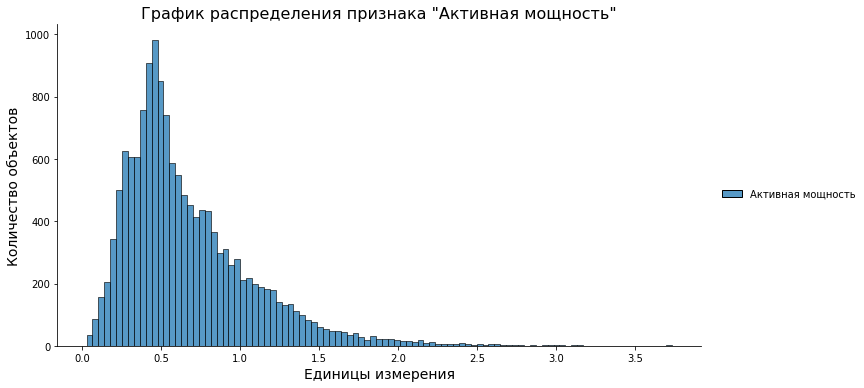

In [18]:
sns.displot(df_arc[['Активная мощность']], aspect=2)

plt.title('График распределения признака "Активная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Признак "Реактивная мощность"

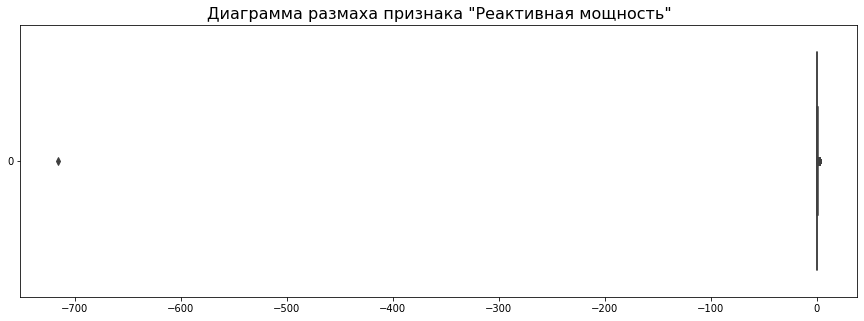

In [37]:
plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['Реактивная мощность'], orient='h')

plt.title('Диаграмма размаха признака "Реактивная мощность"', fontdict={'size': 16});

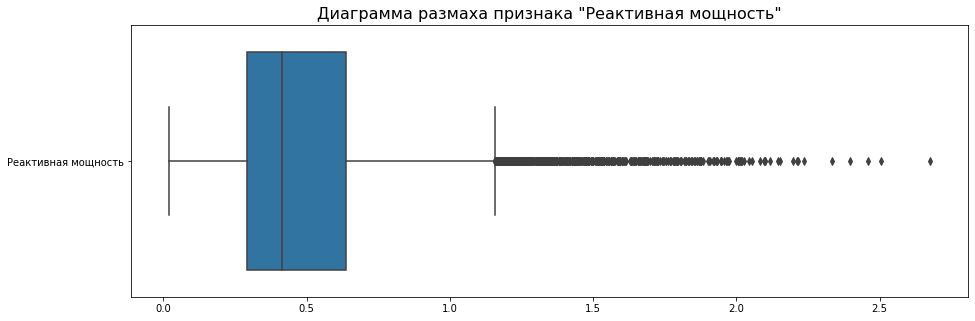

In [38]:
plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc[['Реактивная мощность']][df_arc['Реактивная мощность'] > -700], orient='h')

plt.title('Диаграмма размаха признака "Реактивная мощность"', fontdict={'size': 16});

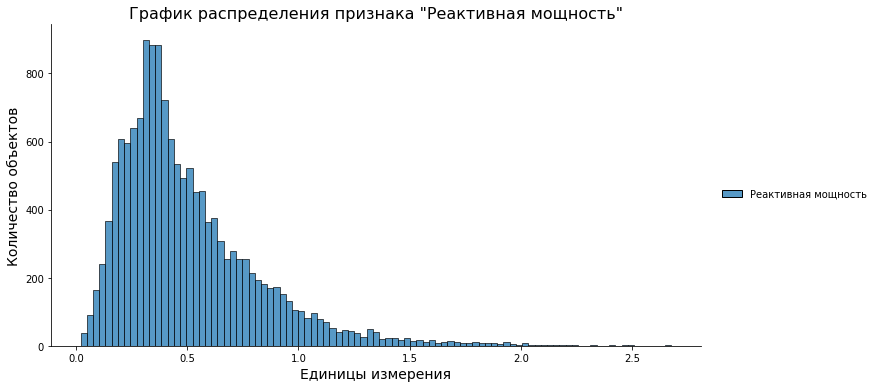

In [24]:
# sns.displot(df_arc[['Реактивная мощность']], aspect=2)
sns.displot(df_arc[['Реактивная мощность']][df_arc['Реактивная мощность'] > -700], aspect=2)

plt.title('График распределения признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Генерация разности признаков "Начало нагрева дугой" и "Конец нагрева дугой"